<a href="https://colab.research.google.com/github/C0k3J/Proyecto-Inteligencia-Clasificaci-n-de-curvas-de-luz-de-estrellas-peri-dicas-EROS/blob/main/Clasificador_Proyecto_inteligencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [12]:
import pandas as pd

Cargamos el dataFrame con la extraccion de caracteristicas

In [4]:
ruta = "/content/drive/MyDrive/Proyecto inteligencia/dataFrame_Extraccion_Caracteristicas"
data_final = pd.read_csv(ruta)
data_final

,MHPS_ratio_r,MHPS_low_r,MHPS_high_r,MHPS_non_zero_r,MHPS_PN_flag_r,MHPS_ratio_b,MHPS_low_b,MHPS_high_b,MHPS_non_zero_b,MHPS_PN_flag_b,...,SmallKurtosis_b,Std_b,StetsonK_b,Pvar_b,ExcessVar_b,SF_ML_amplitude_b,SF_ML_gamma_b,IAR_phi_b,LinearTrend_b,class
0,12.980100,1.376576,0.106053,631.0,0.0,3.182609,0.819120,0.257374,631.0,0.0,...,2.834201,27.284429,0.549106,1.0,0.827649,15.0,0.024925,5.381654e-13,-0.001532,0.0
1,71.145042,0.915911,0.012874,641.0,0.0,1.833821,0.382924,0.208812,641.0,0.0,...,10.123871,20.167322,0.555107,1.0,0.653094,15.0,0.012782,4.209228e-01,-0.003391,0.0
2,5.614127,6.729302,1.198637,620.0,0.0,2.411006,0.702224,0.291258,620.0,0.0,...,11.920089,19.068882,0.593174,1.0,0.596318,15.0,-0.007239,4.895099e-01,-0.001900,0.0
3,8.656989,1.325567,0.153121,641.0,0.0,1.993550,0.586136,0.294016,641.0,0.0,...,11.222284,19.597102,0.679327,1.0,0.653121,15.0,0.011590,4.517053e-01,-0.003109,0.0
4,11.551862,1.261672,0.109218,641.0,0.0,2.239777,0.596540,0.266339,641.0,0.0,...,9.788418,20.432314,0.640825,1.0,0.674507,15.0,0.021669,4.996847e-01,-0.003796,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20756,8.211832,3.106182,0.378257,421.0,0.0,7.639585,3.050167,0.399258,421.0,0.0,...,-1.602573,39.804390,0.828824,1.0,0.740089,15.0,0.221616,7.880645e-01,-0.000759,2.0
20757,9.721752,0.903215,0.092907,539.0,0.0,1.768407,0.270239,0.152815,539.0,0.0,...,19.652159,16.541486,0.791367,1.0,0.668750,15.0,0.049363,6.965433e-09,0.002433,2.0
20758,6.027103,0.971220,0.161142,599.0,0.0,2.523286,0.260579,0.103270,599.0,0.0,...,26.446180,14.659281,0.839727,1.0,0.552430,15.0,0.024818,5.107199e-01,-0.001071,2.0
20759,10.311048,1.354323,0.131347,644.0,0.0,3.794139,0.308168,0.081222,644.0,0.0,...,14.108216,18.563563,0.634100,1.0,0.734634,15.0,0.023729,5.607876e-01,-0.001474,2.0


# Clasificador

In [13]:
# Tratamiento de datos
# ==============================================================================
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# Preprocesado y modelado
# ==============================================================================
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Configuración warnings
# ==============================================================================
import warnings

In [6]:
# Balanceamos los datos:

data_final["class"].value_counts(normalize = True)

underSample =  RandomUnderSampler(random_state = 42)

X = data_final.drop("class",axis=1)
y = data_final["class"]

X_over_data, y_over_data = underSample.fit_resample(X,y)
y_over_data.value_counts(normalize = True)

0.0    0.333333
1.0    0.333333
2.0    0.333333
Name: class, dtype: float64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
X_over_data, y_over_data, test_size=0.3, random_state=42
)

nan_rows_train = np.isnan(X_train).any(axis=1)
nan_rows_test = np.isnan(X_test).any(axis=1)

# Encuentra las filas en las que nan_rows_train es True
rows_with_nan_train = np.where(nan_rows_train)

# Encuentra las filas en las que nan_rows_test es True
rows_with_nan_test = np.where(nan_rows_test)

# Obtén las columnas que contienen NaN en X_train y X_test
rows_with_nan_train = np.array(rows_with_nan_train)  # Convierte la tupla a un array
columns_with_nan_train = np.isnan(X_train.iloc[rows_with_nan_train[0]]).any(axis=0)

rows_with_nan_test = np.array(rows_with_nan_test)  # Convierte la tupla a un array
columns_with_nan_test = np.isnan(X_test.iloc[rows_with_nan_test[0]]).any(axis=0)

# Imprime las columnas con NaN en X_train y X_test
print("Columnas con NaN en X_train:", np.where(columns_with_nan_train)[0])
print("Columnas con NaN en X_test:", np.where(columns_with_nan_test)[0])

Columnas con NaN en X_train: [16 17 18 19]
Columnas con NaN en X_test: []


In [8]:
# Ahora eliminemos los datos que son Nan:
# Elimina las filas con NaN
X_train = X_train[~nan_rows_train]
y_train = y_train[~nan_rows_train]
X_test = X_test[~nan_rows_test]
y_test = y_test[~nan_rows_test]

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Resultados

Se define una funcion que normaliza la matriz de confusión

In [10]:
def normalize_confusion_matrix(conf_matrix):
    normalized_confusion = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]
    return normalized_confusion

#### Profundidad = 5

Clase rrl
presicion: 0.8387109533054927 +/- 0.011742219533951971
recall: 0.8451104100946372 +/- 0.004393813336651156
f1: 0.8418265618596287 +/- 0.004264347347416706
Clase EB
presicion: 0.781259949990953 +/- 0.005044214542680331
recall: 0.779054054054054 +/- 0.015010040467245318
f1: 0.7800436269279082 +/- 0.006246722114889828
Clase CEPH
presicion: 0.9369943093782155 +/- 0.003572695693112159
recall: 0.9316666666666666 +/- 0.004944132324730429
f1: 0.9343106853445295 +/- 0.0026934373357952453


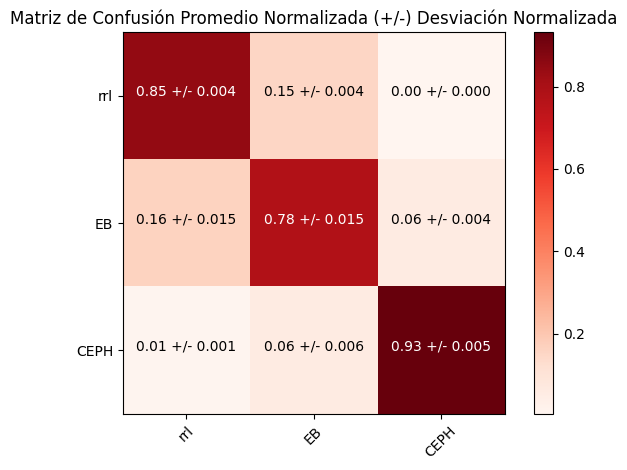

In [11]:
conf_matrix = []

presicion1 = []
recall1 = []
f1_score1 = []

presicion2 = []
recall2 = []
f1_score2 = []

presicion3 = []
recall3 = []
f1_score3 = []

for j in range(5):
  # crear el clasificador
  #classifier = RandomForestClassifier(n_estimators=100)
  classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', max_depth = 5)
  # Entrenar el modelo usando el conjunto de entranamiento
  classifier.fit(X_train_scaled, y_train)

  y_pred = classifier.predict(X_test_scaled)

  # predicción en el conjunto de prueba
  y_pred_test = classifier.predict(X_test_scaled)
  y_pred_train = classifier.predict(X_train_scaled)

  # Metricas:
  a = precision_score(y_test, y_pred_test, average=None)
  r = recall_score(y_test, y_pred_test, average=None)
  f1 = f1_score(y_test, y_pred_test, average=None)

  presicion1.append(a[0])
  recall1.append(r[0])
  f1_score1.append(f1[0])

  presicion2.append(a[1])
  recall2.append(r[1])
  f1_score2.append(f1[1])

  presicion3.append(a[2])
  recall3.append(r[2])
  f1_score3.append(f1[2])


  y_pred = classifier.predict(X_test_scaled)
  cm = confusion_matrix(y_test, y_pred)
  conf_matrix.append(cm)

# Promedio y desv de metricas:

print("Clase rrl")
print(f"presicion: {np.mean(presicion1)} +/- {np.std(presicion1)}")
print(f"recall: {np.mean(recall1)} +/- {np.std(recall1)}")
print(f"f1: {np.mean(f1_score1)} +/- {np.std(f1_score1)}")

print("Clase EB")
print(f"presicion: {np.mean(presicion2)} +/- {np.std(presicion2)}")
print(f"recall: {np.mean(recall2)} +/- {np.std(recall2)}")
print(f"f1: {np.mean(f1_score2)} +/- {np.std(f1_score2)}")

print("Clase CEPH")
print(f"presicion: {np.mean(presicion3)} +/- {np.std(presicion3)}")
print(f"recall: {np.mean(recall3)} +/- {np.std(recall3)}")
print(f"f1: {np.mean(f1_score3)} +/- {np.std(f1_score3)}")


#Define las etiquetas de las clases
class_labels = ["rrl", "EB", "CEPH"]

prom_conf = np.mean(conf_matrix, axis = 0)
desv_conf = np.std(conf_matrix, axis = 0)


# Normaliza la matriz de confusión promedio
normalized_prom_conf = normalize_confusion_matrix(prom_conf)

# Calcula la matriz de desviación estándar normalizada
normalized_desv_conf = desv_conf / prom_conf.sum(axis=1)[:, np.newaxis]

# Prepara la matriz de texto que incluye tanto el valor normalizado como la desviación estándar normalizada
combined_normalized_confusion = np.array([[
    f"{normalized_prom_conf[i, j]:.2f} +/- {normalized_desv_conf[i, j]:.3f}"
    for j in range(normalized_prom_conf.shape[1])
] for i in range(normalized_prom_conf.shape[0])])

# Muestra la matriz de confusión normalizada con desviación estándar normalizada
plt.imshow(normalized_prom_conf, interpolation='nearest', cmap=plt.cm.Reds)
plt.title('Matriz de Confusión Promedio Normalizada (+/-) Desviación Normalizada')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

# Anota los valores normalizados con desviación estándar normalizada en la matriz de confusión
for i, j in itertools.product(range(normalized_prom_conf.shape[0]), range(normalized_prom_conf.shape[1])):
    plt.text(j, i, combined_normalized_confusion[i, j],
             horizontalalignment="center",
             color="white" if normalized_prom_conf[i, j] > 0.5 else "black")

# Muestra el gráfico
plt.tight_layout()
plt.show()

#### Profundidad = 10

Clase rrl
presicion: 0.8837747708440308 +/- 0.002581526798719033
recall: 0.8586750788643533 +/- 0.003811686427001419
f1: 0.871037502088946 +/- 0.0022355594773033
Clase EB
presicion: 0.8161004337525674 +/- 0.0038982123454143146
recall: 0.8439189189189188 +/- 0.003939832361381968
f1: 0.829762924064784 +/- 0.002007432921235411
Clase CEPH
presicion: 0.9484845059152391 +/- 0.0022962933684695934
recall: 0.945 +/- 0.002981423969999739
f1: 0.9467347098675418 +/- 0.001730858811952366


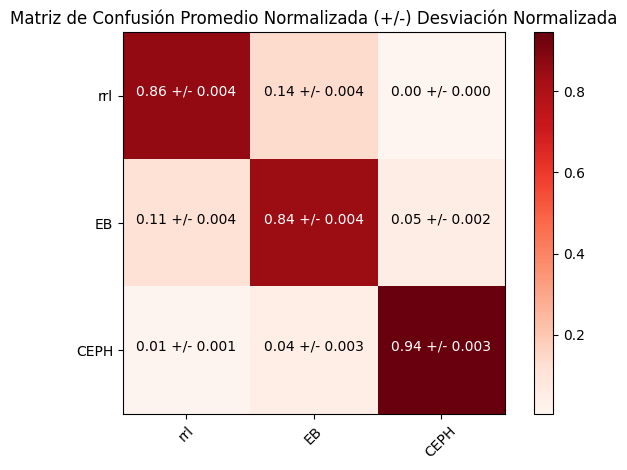

In [ ]:
conf_matrix = []

presicion1 = []
recall1 = []
f1_score1 = []

presicion2 = []
recall2 = []
f1_score2 = []

presicion3 = []
recall3 = []
f1_score3 = []

for j in range(5):
  # crear el clasificador
  #classifier = RandomForestClassifier(n_estimators=100)
  classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', max_depth = 10)
  # Entrenar el modelo usando el conjunto de entranamiento
  classifier.fit(X_train_scaled, y_train)

  y_pred = classifier.predict(X_test_scaled)

  # predicción en el conjunto de prueba
  y_pred_test = classifier.predict(X_test_scaled)
  y_pred_train = classifier.predict(X_train_scaled)

  # Metricas:
  a = precision_score(y_test, y_pred_test, average=None)
  r = recall_score(y_test, y_pred_test, average=None)
  f1 = f1_score(y_test, y_pred_test, average=None)

  presicion1.append(a[0])
  recall1.append(r[0])
  f1_score1.append(f1[0])

  presicion2.append(a[1])
  recall2.append(r[1])
  f1_score2.append(f1[1])

  presicion3.append(a[2])
  recall3.append(r[2])
  f1_score3.append(f1[2])


  y_pred = classifier.predict(X_test_scaled)
  cm = confusion_matrix(y_test, y_pred)
  conf_matrix.append(cm)

# Promedio y desv de metricas:

print("Clase rrl")
print(f"presicion: {np.mean(presicion1)} +/- {np.std(presicion1)}")
print(f"recall: {np.mean(recall1)} +/- {np.std(recall1)}")
print(f"f1: {np.mean(f1_score1)} +/- {np.std(f1_score1)}")

print("Clase EB")
print(f"presicion: {np.mean(presicion2)} +/- {np.std(presicion2)}")
print(f"recall: {np.mean(recall2)} +/- {np.std(recall2)}")
print(f"f1: {np.mean(f1_score2)} +/- {np.std(f1_score2)}")

print("Clase CEPH")
print(f"presicion: {np.mean(presicion3)} +/- {np.std(presicion3)}")
print(f"recall: {np.mean(recall3)} +/- {np.std(recall3)}")
print(f"f1: {np.mean(f1_score3)} +/- {np.std(f1_score3)}")


#Define las etiquetas de las clases
class_labels = ["rrl", "EB", "CEPH"]

prom_conf = np.mean(conf_matrix, axis = 0)
desv_conf = np.std(conf_matrix, axis = 0)

# Normaliza la matriz de confusión promedio
normalized_prom_conf = normalize_confusion_matrix(prom_conf)

# Calcula la matriz de desviación estándar normalizada
normalized_desv_conf = desv_conf / prom_conf.sum(axis=1)[:, np.newaxis]

# Prepara la matriz de texto que incluye tanto el valor normalizado como la desviación estándar normalizada
combined_normalized_confusion = np.array([[
    f"{normalized_prom_conf[i, j]:.2f} +/- {normalized_desv_conf[i, j]:.3f}"
    for j in range(normalized_prom_conf.shape[1])
] for i in range(normalized_prom_conf.shape[0])])

# Muestra la matriz de confusión normalizada con desviación estándar normalizada
plt.imshow(normalized_prom_conf, interpolation='nearest', cmap=plt.cm.Reds)
plt.title('Matriz de Confusión Promedio Normalizada (+/-) Desviación Normalizada')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

# Anota los valores normalizados con desviación estándar normalizada en la matriz de confusión
for i, j in itertools.product(range(normalized_prom_conf.shape[0]), range(normalized_prom_conf.shape[1])):
    plt.text(j, i, combined_normalized_confusion[i, j],
             horizontalalignment="center",
             color="white" if normalized_prom_conf[i, j] > 0.5 else "black")

# Muestra el gráfico
plt.tight_layout()
plt.show()

#### Profundidad = 20

Clase rrl
presicion: 0.887018740394403 +/- 0.004607473095514719
recall: 0.8593059936908517 +/- 0.0030584730961617022
f1: 0.8729400743571445 +/- 0.0035965133306441535
Clase EB
presicion: 0.8176548408171515 +/- 0.004780060386529963
recall: 0.8513513513513512 +/- 0.005233761278658661
f1: 0.8341601845588226 +/- 0.004768118234274891
Clase CEPH
presicion: 0.9509784795880607 +/- 0.003898825632668575
recall: 0.9436666666666668 +/- 0.0028674417556808565
f1: 0.9472997251641677 +/- 0.0018487818047983632


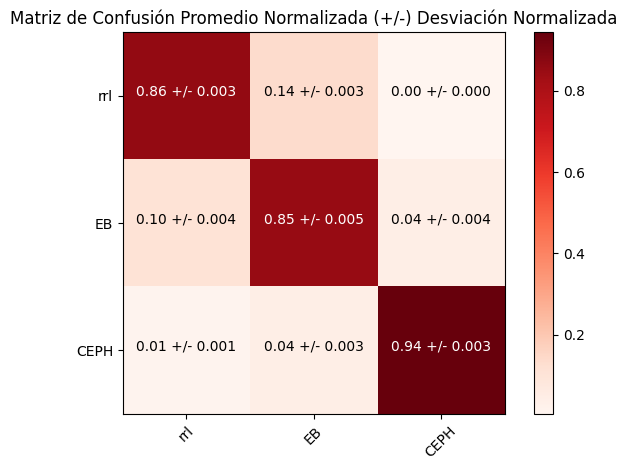

In [ ]:
conf_matrix = []

presicion1 = []
recall1 = []
f1_score1 = []

presicion2 = []
recall2 = []
f1_score2 = []

presicion3 = []
recall3 = []
f1_score3 = []

for j in range(5):
  # crear el clasificador
  #classifier = RandomForestClassifier(n_estimators=100)
  classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', max_depth = 20)
  # Entrenar el modelo usando el conjunto de entranamiento
  classifier.fit(X_train_scaled, y_train)

  y_pred = classifier.predict(X_test_scaled)

  # predicción en el conjunto de prueba
  y_pred_test = classifier.predict(X_test_scaled)
  y_pred_train = classifier.predict(X_train_scaled)

  # Metricas:
  a = precision_score(y_test, y_pred_test, average=None)
  r = recall_score(y_test, y_pred_test, average=None)
  f1 = f1_score(y_test, y_pred_test, average=None)

  presicion1.append(a[0])
  recall1.append(r[0])
  f1_score1.append(f1[0])

  presicion2.append(a[1])
  recall2.append(r[1])
  f1_score2.append(f1[1])

  presicion3.append(a[2])
  recall3.append(r[2])
  f1_score3.append(f1[2])


  y_pred = classifier.predict(X_test_scaled)
  cm = confusion_matrix(y_test, y_pred)
  conf_matrix.append(cm)

# Promedio y desv de metricas:

print("Clase rrl")
print(f"presicion: {np.mean(presicion1)} +/- {np.std(presicion1)}")
print(f"recall: {np.mean(recall1)} +/- {np.std(recall1)}")
print(f"f1: {np.mean(f1_score1)} +/- {np.std(f1_score1)}")

print("Clase EB")
print(f"presicion: {np.mean(presicion2)} +/- {np.std(presicion2)}")
print(f"recall: {np.mean(recall2)} +/- {np.std(recall2)}")
print(f"f1: {np.mean(f1_score2)} +/- {np.std(f1_score2)}")

print("Clase CEPH")
print(f"presicion: {np.mean(presicion3)} +/- {np.std(presicion3)}")
print(f"recall: {np.mean(recall3)} +/- {np.std(recall3)}")
print(f"f1: {np.mean(f1_score3)} +/- {np.std(f1_score3)}")


#Define las etiquetas de las clases
class_labels = ["rrl", "EB", "CEPH"]

prom_conf = np.mean(conf_matrix, axis = 0)
desv_conf = np.std(conf_matrix, axis = 0)


# Normaliza la matriz de confusión promedio
normalized_prom_conf = normalize_confusion_matrix(prom_conf)

# Calcula la matriz de desviación estándar normalizada
normalized_desv_conf = desv_conf / prom_conf.sum(axis=1)[:, np.newaxis]

# Prepara la matriz de texto que incluye tanto el valor normalizado como la desviación estándar normalizada
combined_normalized_confusion = np.array([[
    f"{normalized_prom_conf[i, j]:.2f} +/- {normalized_desv_conf[i, j]:.3f}"
    for j in range(normalized_prom_conf.shape[1])
] for i in range(normalized_prom_conf.shape[0])])

# Muestra la matriz de confusión normalizada con desviación estándar normalizada
plt.imshow(normalized_prom_conf, interpolation='nearest', cmap=plt.cm.Reds)
plt.title('Matriz de Confusión Promedio Normalizada (+/-) Desviación Normalizada')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

# Anota los valores normalizados con desviación estándar normalizada en la matriz de confusión
for i, j in itertools.product(range(normalized_prom_conf.shape[0]), range(normalized_prom_conf.shape[1])):
    plt.text(j, i, combined_normalized_confusion[i, j],
             horizontalalignment="center",
             color="white" if normalized_prom_conf[i, j] > 0.5 else "black")

# Muestra el gráfico
plt.tight_layout()
plt.show()